In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
np.random.seed(0)

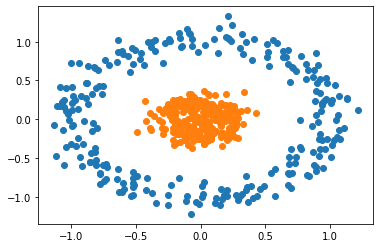

In [3]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)
#print(X) 
#print(y)
 
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [4]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate = 0.01), 'binary_crossentropy', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs= 100, shuffle=True)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6958 - accuracy: 0.4620
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4620
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4720
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.6760
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4920
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.6420
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5920
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4720
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5800
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.6100
Epoch 11/

25/25 [==============================] - 0s 1ms/step - loss: 0.1620 - accuracy: 0.9680
Epoch 83/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.9780
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1415 - accuracy: 0.9780
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1325 - accuracy: 0.9900
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1243 - accuracy: 0.9940
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 0.9940
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.9940
Epoch 89/100
 1/25 [>.............................] - ETA: 0s - loss: 0.0834 - accuracy: 1.0000

In [ ]:
plt.plot(h.history['accuracy'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [ ]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

In [ ]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

# change of value y for testing purpose
x = 0
y = 0.25 
 
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="white")
print("Prediction is: ", predict)